# Lab - Model selection

The aim of this lab session is to
* measure the empirical risk of a supervised learning model for different sample sizes (i.e. different quantities of training samples)
* select the optimal value and evaluate the generalisability of a supervised learning (classification) model using 
 * a division into training, validation and test data 
 * the principle of cross-validation

In [8]:
import numpy as np
import pandas as pd

import random

import seaborn as sn

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

## Part 1. Data

The data used in this tutorial are images of handwritten numbers. Automatic recognition of these digits (and more generally of handwriting) is a classic but complex problem. It is used in particular in automatic mail sorting systems.
The data used for this tutorial corresponds to a simplified extract from the MNIST (Modified National Institute of Standards and Technology) data set, which originally contained 70,000 images of digits (0 to 9). 

Each image (i.e. an observation) is 8 pix in size. This corresponds to a vector made up of $d=64$ variables ($\mathbf{x}_i \in \mathbb{R}^d$ for $1\le i\le m$).

**Note**: The 8 pix $\times$ 8 pix thumbnails are obtained by applying a dimension reduction to the original 32 pix $\times$ 32 pix binary images. The original images were cut into blocks of 4 $\times$ 4 pix. (with no overlap). In each block, the number of "1s" used as new pixel values was counted to create a (non-binary) image of size 8 pix. $\times$ 8 pix with each pixel able to have a value between 0 and 16.

In [9]:
#-- Downloading the data
digits = datasets.load_digits()
X = digits.data
Y = digits.target
#print(digits.DESCR)

In [10]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

<Figure size 640x480 with 0 Axes>

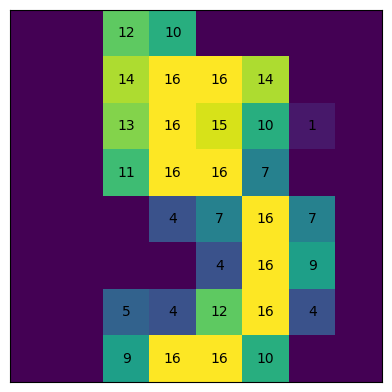

Variables:  [ 0.  0. 12. 10.  0.  0.  0.  0.  0.  0. 14. 16. 16. 14.  0.  0.  0.  0.
 13. 16. 15. 10.  1.  0.  0.  0. 11. 16. 16.  7.  0.  0.  0.  0.  0.  4.
  7. 16.  7.  0.  0.  0.  0.  0.  4. 16.  9.  0.  0.  0.  5.  4. 12. 16.
  4.  0.  0.  0.  9. 16. 16. 10.  0.  0.]
Label:  5


<Figure size 640x480 with 0 Axes>

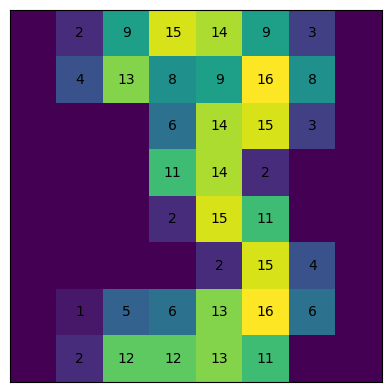

Variables:  [ 0.  2.  9. 15. 14.  9.  3.  0.  0.  4. 13.  8.  9. 16.  8.  0.  0.  0.
  0.  6. 14. 15.  3.  0.  0.  0.  0. 11. 14.  2.  0.  0.  0.  0.  0.  2.
 15. 11.  0.  0.  0.  0.  0.  0.  2. 15.  4.  0.  0.  1.  5.  6. 13. 16.
  6.  0.  0.  2. 12. 12. 13. 11.  0.  0.]
Label:  3


In [11]:
#-- Data visualisation
disp_imgno = [5, 13] # Test other values
for ll in disp_imgno:
    plt.figure()
    plt.matshow(digits.images[ll])
    for (i, j), z in np.ndenumerate(digits.images[ll]):
        if z!=0:
            plt.text(j, i, '{:d}'.format(int(z)), ha='center', va='center')
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    plt.show()
    print("Variables: ", X[ll,:])
    print("Label: ", Y[ll])

**Questions** : 
* What is the link between the images (`digit.images[ll]`) and the variables (`X[ll,:]`) + the labels (`Y[ll]`)? 
* What is the number of training data?

The images (`digit.images[ll]`) is the image as a matriz of 8 x 8. While the the variables `X[ll,:]` are the array with value of the pixels, the size is 64 due to the size of the image. Additionally, the labels `Y[ll]` are the class the system identified or classified, so they are the digits from 0 to 9.
the number of training data is 1797

## Part 2. Influence of the sample size
The objective here is to evaluate the performance of a classification algorithm (empirical risk and real risk), the $k$-Nearest Neighbours (NN), when the number of training data increases ($m$).

### 1. Empiric risk

**2.1.a** Apply a $k$-PPV with $k=1$. Calculate the error rate (which corresponds to the empirical risk $\mathcal{R}_{emp}$) and explain the result.

**Tips**: 
* You can use the $k$-PPV algorithm from Scikit-Learn: [doc](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). Find the name of the hyperparameter that allows you to set the number of neighbours considered during learning ($k$).
* The error rate is equal to 1 - Overall Accuracy. You can implement your own function or use Scikit-Learn fonctionalities

In [12]:
pd.DataFrame(Y).value_counts()

0
3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: count, dtype: int64

In [13]:
#-- Write your code here - train the model with teh entire dataset
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X,Y)

# Calculate the error rate
y_pred = neigh.predict(X)
error_rate = 1 - accuracy_score(Y, y_pred)
print(f"Error rate: {error_rate}")


Error rate: 0.0


**2.1.b** Apply a $k$-PPV with $k=5$. Calculate the error rate $\mathcal{R}_{emp}$ and display the confusion matrix.

**Tip**: 
Let `C` be your confusion matrix.
* For a simple display of the confusion matrix :
``` 
plt.figure()
plt.imshow(C)
plt.show()
```
* For a more elaborate display with Seaborn :
```
labels = data.target_names
df_cm = pd.DataFrame(C, index = [i for i in labels],columns = [i for i in labels])
plt.figure()
sn.heatmap(df_cm, annot=True, fmt='d')
```

In [14]:
#-- Write your code here

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X,Y)

# Calculate the error rate
y_pred = neigh.predict(X)
error_rate = 1 - accuracy_score(Y, y_pred)
print(f"Error rate: {error_rate}")


Error rate: 0.009460211463550361


In [15]:
# Compute the confusion matrix
from sklearn.metrics import confusion_matrix

C = confusion_matrix(Y, y_pred)
C


array([[178,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 182,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 177,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 181,   0,   0,   0,   2,   0,   0],
       [  0,   0,   0,   0, 181,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 180,   1,   0,   0,   1],
       [  0,   0,   0,   0,   0,   0, 181,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 178,   0,   1],
       [  0,   3,   0,   0,   0,   0,   1,   0, 170,   0],
       [  0,   1,   0,   3,   1,   1,   0,   0,   2, 172]])

<Axes: >

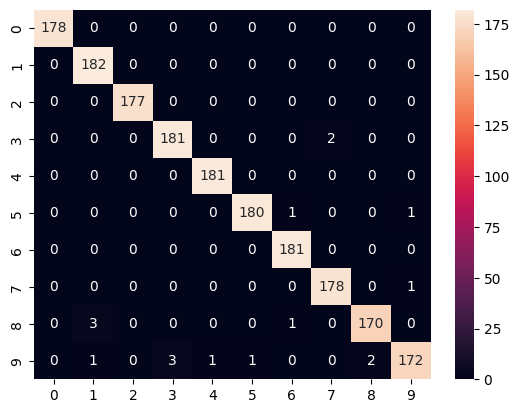

In [16]:
indices = [int(i) for i in Y]
df_cm = pd.DataFrame(C)
plt.figure()
sn.heatmap(df_cm, annot=True, fmt='d')

**2.1.c** Plot the evolution of the empirical risk, for $k=5$, as a function of the size of the training data.
* Define the different training sizes: `size = [5, 10, 25, 50, 75, 100, 150, 200, 250, 500, 1000, 1500]`.
* Draw a random sample of the given size.
Note: you can also use the `random.sample` method in the `random` module.
* Apply a $5$-PPV for each sample size and calculate $\mathcal{R}_{emp}$ the empirical risk.
* Plot the evolution of the empirical risk as a function of sample size: $\mathcal{R}_{emp}=f(size)$.

**Comment**

In [17]:
#-- Write your code here
from sklearn.metrics import precision_score

num_samples = [5, 10, 25, 50, 75, 100, 150, 200, 250, 500, 1000, 1500]

error_rates = []
precisions = []
for size in num_samples:
    indices = random.sample(range(X.shape[0]), size)
    X_sample = X[indices,:]
    Y_sample = Y[indices]
    neigh = KNeighborsClassifier(n_neighbors=5)
    neigh.fit(X_sample, Y_sample)

    # Now predict on the entire dataset without the random samples included in the training set
    indices_remainder = np.setdiff1d(range(X.shape[0]), indices)
    X_remainder = X[indices_remainder,:]
    Y_remainder = Y[indices_remainder]
    y_pred = neigh.predict(X_remainder)
    
    precision = precision_score(Y_remainder, y_pred, average = 'macro', zero_division=0)
    precisions.append(precision)
    
    error_rate = 1 - accuracy_score(Y_remainder, y_pred)
    error_rates.append(error_rate)


In [18]:
precisions

[0.009933035714285714,
 0.0700047818285244,
 0.47438994007151614,
 0.7210636701375686,
 0.8610750289748195,
 0.8739306078554927,
 0.9030884439204762,
 0.9307183559249615,
 0.9192392108574822,
 0.9642617192777768,
 0.9846098919690265,
 0.9830592020592022]

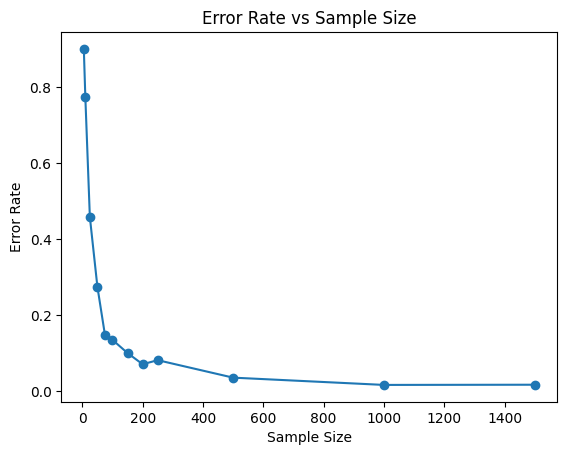

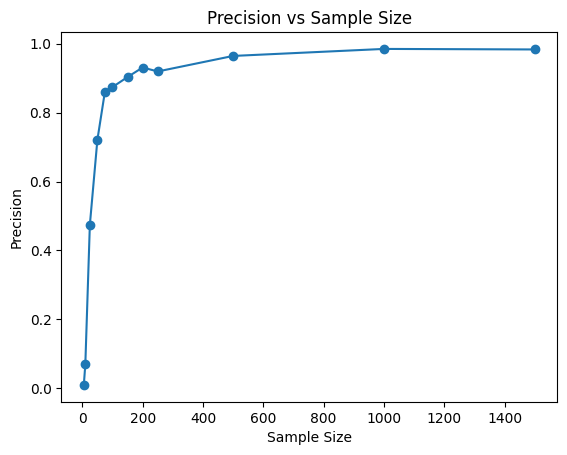

In [19]:
plt.plot(num_samples, error_rates, marker='o')
plt.xlabel('Sample Size')
plt.ylabel('Error Rate')
plt.title('Error Rate vs Sample Size')
plt.show()

plt.plot(num_samples, precisions, marker='o')
plt.xlabel('Sample Size')
plt.ylabel('Precision')
plt.title('Precision vs Sample Size')
plt.show()


Your comment: The code takes the number of samples based on given array as the training data and the reminder samples as testing data. We can see how with the addition of samples the error goes down and the precision goes up. 

### 2. True risk and generalisation error, $k$ fixed

**2.2.a** Calculate an estimate of the generalisation error using a training and test set ($N=297$), for the different training sample sizes tested above (size), and always considering a $5$-PPV.
* Randomly divide the samples into training and test subsets: ` Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, test_size=N)` where `N` is the desired test sample size.
* Superimpose the two curves showing the evolution of the empirical risk and the real risk as a function of the size of the training sample. Feel free to display the curves only for the largest training sample sizes.

**Compare and comment**

In [20]:
#-- Write your code 
from sklearn.metrics import precision_score
num_samples = [5, 10, 25, 50, 75, 100, 150, 200, 250, 500, 1000, 1400]
N = 297

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, test_size=N)

In [21]:

def kneigh(num_samples, Xtrain, Ytrain, Xtest, Ytest, N:int):
    errors_train = []
    precisions_train = []
    errors_test = []
    precisions_test = []

    for size in num_samples:
        # Training
        indices = random.sample(range(len(Xtrain)), size)
        X_sample = Xtrain[indices,:]
        Y_sample = Ytrain[indices]
        neigh = KNeighborsClassifier(n_neighbors=5)
        neigh.fit(X_sample, Y_sample)

        ### Evaluation on ALL training data
        y_pred_train = neigh.predict(Xtrain)
        precision_train = precision_score(Ytrain, y_pred_train, average = 'macro', zero_division=0)
        precisions_train.append(precision_train)
        error_train = 1 - accuracy_score(Ytrain, y_pred_train)
        errors_train.append(error_train)

        ### Evaluation on ALL test data
        y_pred_test = neigh.predict(Xtest)
        precision_test = precision_score(Ytest, y_pred_test, average = 'macro', zero_division=0)
        precisions_test.append(precision_test)
        error_test = 1 - accuracy_score(Ytest, y_pred_test)
        errors_test.append(error_test)

    return errors_train, errors_test


In [22]:
errors_train_single, errors_test_single = kneigh(num_samples, Xtrain, Ytrain, Xtest, Ytest, N)

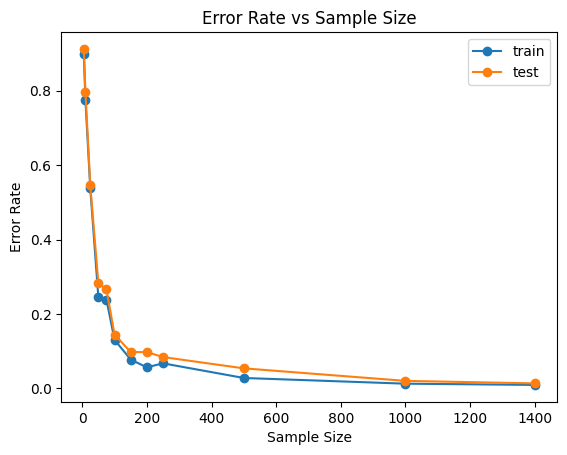

In [260]:
plt.plot(num_samples, errors_train_single, marker='o', label = 'train')
plt.plot(num_samples, errors_test_single, marker='o', label = 'test')
plt.xlabel('Sample Size')
plt.ylabel('Error Rate')
plt.title('Error Rate vs Sample Size')
plt.legend()
plt.show()


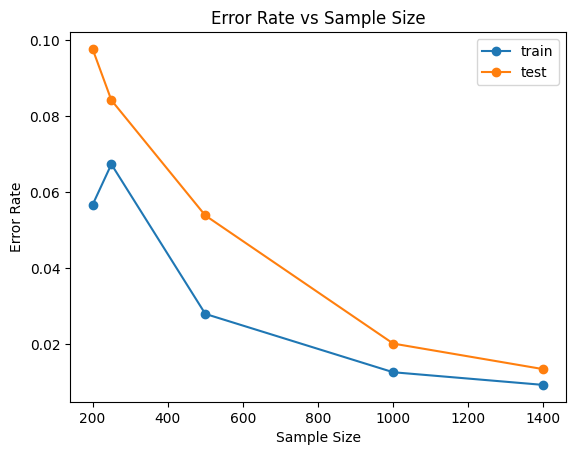

In [261]:
samples_to_include = 5
plt.plot(num_samples[-samples_to_include:], errors_train_single[-samples_to_include:], marker='o', label = 'train')
plt.plot(num_samples[-samples_to_include:], errors_test_single[-samples_to_include:], marker='o', label = 'test')
plt.xlabel('Sample Size')
plt.ylabel('Error Rate')
plt.title('Error Rate vs Sample Size')
plt.legend()
plt.show()


Compare and comment: Each time I run the code it has a different behavior, and in this last time, it doesn't show an overfitting or underfitting, the train and the test curve are almost the same. 

**2.2.b** Up to now, the results have been obtained for a single repetition, although the results depend on the split between the training and test data. This procedure is generally repeated several times in order to obtain the mean and variance of the results.

Repeat the previous procedure (2.2.a) 20 times, and calculate the mean empirical and true risks, as well as the associated variances. Compare the results with those obtained from a single repetition.

**Tip**: you can display the results using plt.errorbar() to display the curve +/- one standard deviation.

**Comment**

In [23]:
import numpy as np

#-- Rerun for 20 runs
# true risk
errors_train = []
# empirical risk
errors_test = []

for i in range(20):
    error_train, error_test = kneigh(num_samples, Xtrain, Ytrain, Xtest, Ytest, N)
    errors_train.append(error_train)
    errors_test.append(error_test)
    

In [24]:
errors_train_mean = np.array(errors_train).mean(axis = 0)
errors_test_mean = np.array(errors_test).mean(axis = 0)

errors_train_std = np.array(errors_train).std(axis = 0)
errors_test_std = np.array(errors_test).std(axis = 0)

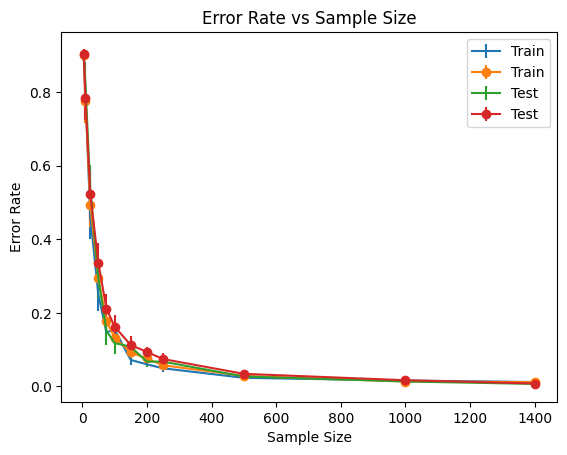

In [25]:
#-- Display the resuls

plt.errorbar(num_samples, errors_train_single, yerr=errors_train_std, label='Train')
plt.errorbar(num_samples, errors_train_mean, yerr=errors_train_std, label='Train', marker='o')
plt.errorbar(num_samples, errors_test_single, yerr=errors_test_std, label='Test')
plt.errorbar(num_samples, errors_test_mean, yerr=errors_test_std, label='Test', marker='o')
plt.xlabel('Sample Size')
plt.ylabel('Error Rate')
plt.title('Error Rate vs Sample Size')
plt.legend()
plt.show()

In [26]:
def plot_error_bars(errors_single, errors_mean, errors_std, num_samples):
    plt.figure(figsize=(10, 6)) 
    plt.plot(errors_single, errors_single, '--', label='y=x')

    cmap = plt.cm.inferno

    colors = cmap(np.linspace(0, 1, len(num_samples)))
    for x, y, yerr, c, s in zip(errors_single, errors_mean, errors_std, colors, num_samples):
        plt.errorbar(
            x, y, yerr=yerr,
            label=f'Sample {s}',
            marker='o', linestyle='none',
            color=c
        )

    plt.xlabel('Error Rate Single')
    plt.ylabel('Error Rate 20 Mean')
    plt.title('Train - Error Rate Single vs Error 20 Rate Mean')
    plt.legend()
    plt.show()


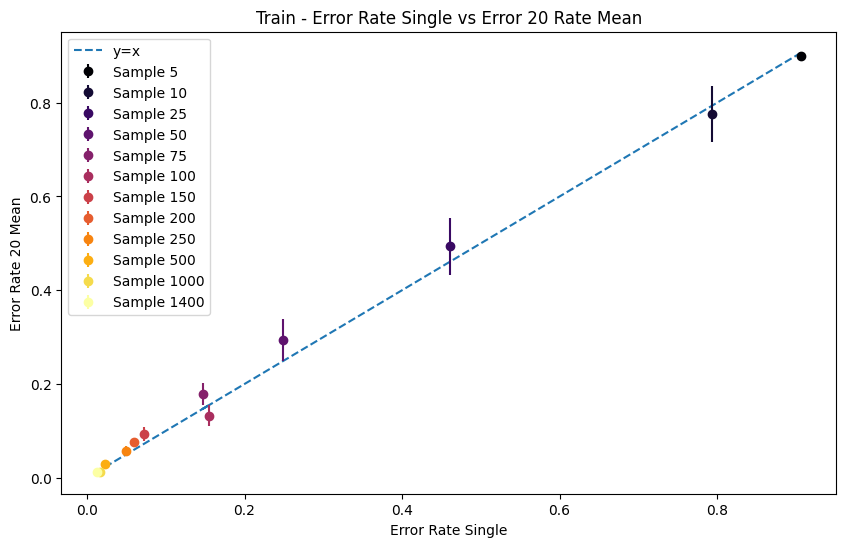

In [27]:
plot_error_bars(errors_train_single, errors_train_mean, errors_train_std, num_samples)

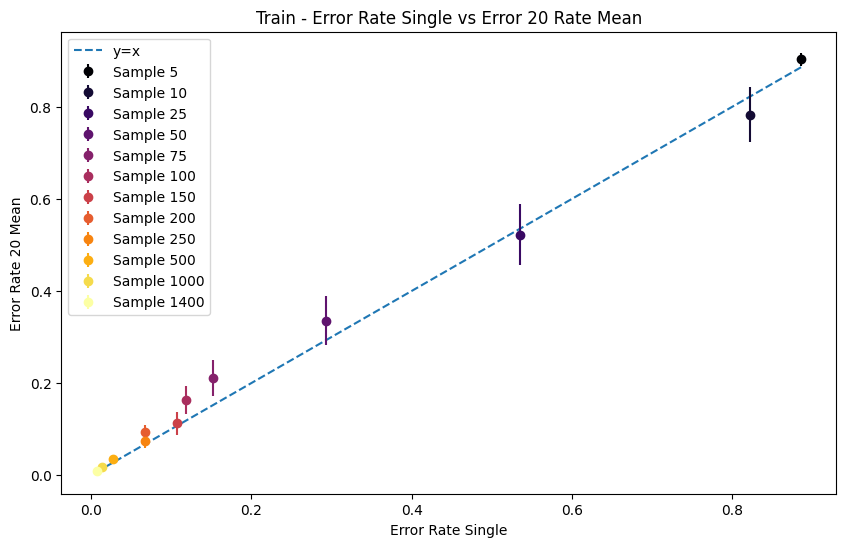

In [28]:
plot_error_bars(errors_test_single, errors_test_mean, errors_test_std, num_samples)


**2.2.c** Carry out a cross validation on 5 subsets / partitions (*$5$-fold cross validation*) on all the training data (always with the $5$-PPV). Give an estimate of the generalisation error: `scores = cross_val_score(knn, X, Y, cv=5)` [doc](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html?highlight=cross_val_score#sklearn.model_selection.cross_val_score).

**Question**: What is the average Overall Accuracy value you obtain?

In [36]:
#-- Write your code here
from sklearn.model_selection import cross_val_score

def knn_cross_validation(Xtrain, Ytrain,k):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, Xtrain, Ytrain, cv=5)
    return scores

scores = knn_cross_validation(Xtrain, Ytrain, k = 5)
print(
    "Accuracy score via cross-validation:\n"
    f"{scores.mean():.3f} ± {scores.std():.3f} \n"
    "The error rate is 1 - accuracy score:\n"
    f"{1 - scores.mean():.3f} ± {scores.std():.3f}"
)


Accuracy score via cross-validation:
0.982 ± 0.011 
The error rate is 1 - accuracy score:
0.018 ± 0.011


**Your answer**: I got an accuracy of 0.985 ± 0.011 and the generalisation error was 0.018 ± 0.011

## Part 3. Selecting the best $k$-hyperparameter (of the $k$-PPV) and estimating generalisation

The aim of this part is to determine the best value for the $k$ hyperparameter of the PPV algorithm and to evaluate the generalisation performance.

**3.1** Plot the evolution of the empirical risk for $k\in [1,30]$. **Comment**

In [38]:
k_values = list(range(1, 30))
accuracy_score = []
for k in k_values:
    accuracy_score.append((knn_cross_validation(X, Y, k)).mean())


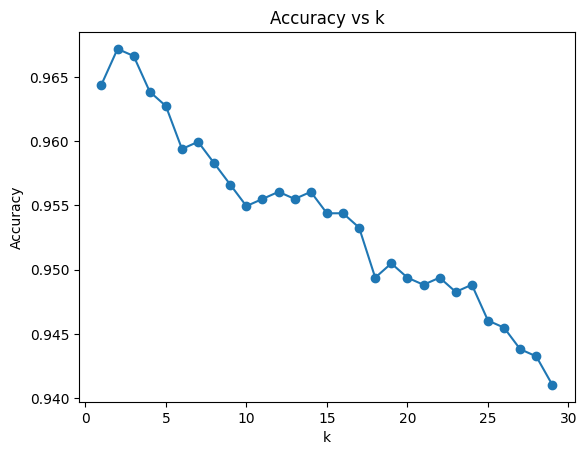

The optimal k is 2


In [39]:
plt.plot(k_values, accuracy_score, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k')
plt.show()

optimal_k = k_values[accuracy_score.index(max(accuracy_score))]

print(f"The optimal k is {optimal_k}")

**Your comment**: Based on the plot(pick) and the max, the optimal hyperparameter for k-ppv is 2.

**3.2** Create a training set containing 80% of the data. The remaining 20% will be test data.

In [40]:
#-- Write your code here
data_train, data_test, target_train, target_test = train_test_split(
    X, Y, train_size=0.8, random_state=42
)


**3.3** For $k\in [1,30]$, perform a 5 subset cross-validation (*$5$-fold cross-validation*) on the training dataset. The same training dataset will be considered.

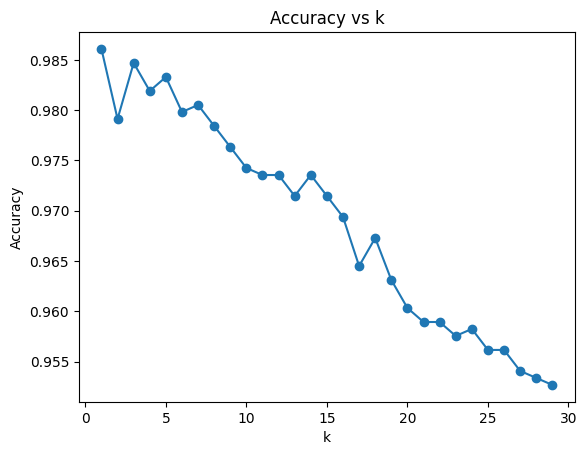

The optimal k is 1


In [41]:
#-- Write your code here

k_values = list(range(1, 30))
accuracy_score = []
for k in k_values:
    accuracy_score.append((knn_cross_validation(data_train, target_train, k)).mean())

plt.plot(k_values, accuracy_score, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k')
plt.show()

optimal_k = k_values[accuracy_score.index(max(accuracy_score))]

print(f"The optimal k is {optimal_k}")

**3.4** What is the best value of $k$ to choose?

**Your answer**

Based on the result, the best k is 1.

**3.5** For this optimal value of $k$, give an estimate of the real risk. The learning step will be carried out on the training and validation data.

In [334]:
#-- Write your code here
from sklearn.metrics import accuracy_score

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(data_train, target_train)

y_pred = neigh.predict(data_test)
error_rate = 1 - accuracy_score(target_test, y_pred)
print(f"Error rate: {error_rate}")


Error rate: 0.022222222222222254


**3.6** Compute the confusion matrix for the model. What do you think of this model?

<Axes: >

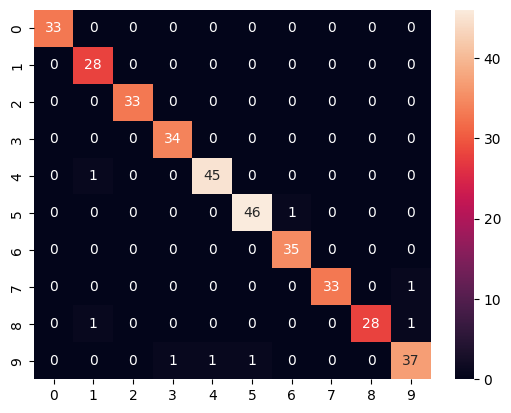

In [336]:
#-- Write your code here
from sklearn.metrics import confusion_matrix

C = confusion_matrix(target_test, y_pred)
df_cm = pd.DataFrame(C)
plt.figure()
sn.heatmap(df_cm, annot=True, fmt='d')


**Your answer**

**3.7** Finally, give an estimate of the real risk by implementing a nested cross validation (with $k=10$ for the outter loop).

What is the value of the average real risk you obtain?

In [338]:
#-- Write your code here
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import cross_val_score

# Declare the inner and outer cross-validation strategies
model_to_tune = KNeighborsClassifier()

# Declare the inner and outer cross-validation strategies
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = KFold(n_splits=10, shuffle=True, random_state=0)

param_grid = {"n_neighbors": k_values} 

# Inner cross-validation for parameter search
model = GridSearchCV(
    estimator=model_to_tune, param_grid=param_grid, cv=inner_cv
)

# Outer cross-validation to compute the testing score
test_score = cross_val_score(model, X, Y, cv=outer_cv)
print(
    "The mean score using nested cross-validation is: "
    f"{test_score.mean():.3f} ± {test_score.std():.3f}"
)


The mean score using nested cross-validation is: 0.983 ± 0.010


**Your answer**

The mean score using nested cross-validation is: 0.983 ± 0.010